In [17]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
def extract_latency(file_path, label):
    with open(file_path, "r") as file:
        raw_data = file.read()
    values = [int(match) for match in re.findall(r'# click\s*(\d+)', raw_data)]
    values_in_ms = [value / 1000 for value in values]
    
    return pd.DataFrame({'Latency (ms)': values_in_ms, 'Source': label})

# Latenzdaten aus beiden Dateien extrahieren
df_0 = extract_latency("latency_system/latency_0.txt", "Latency 0")
df_80 = extract_latency("latency_system/latency_80.txt", "Latency 80")


In [37]:
df = pd.concat([df_0, df_80], ignore_index=True)
df

,Latency (ms),Source
0,0.112,Latency 0
1,12.216,Latency 0
2,13.436,Latency 0
3,12.768,Latency 0
4,12.212,Latency 0
...,...,...
140,92.676,Latency 80
141,92.424,Latency 80
142,93.680,Latency 80
143,94.196,Latency 80


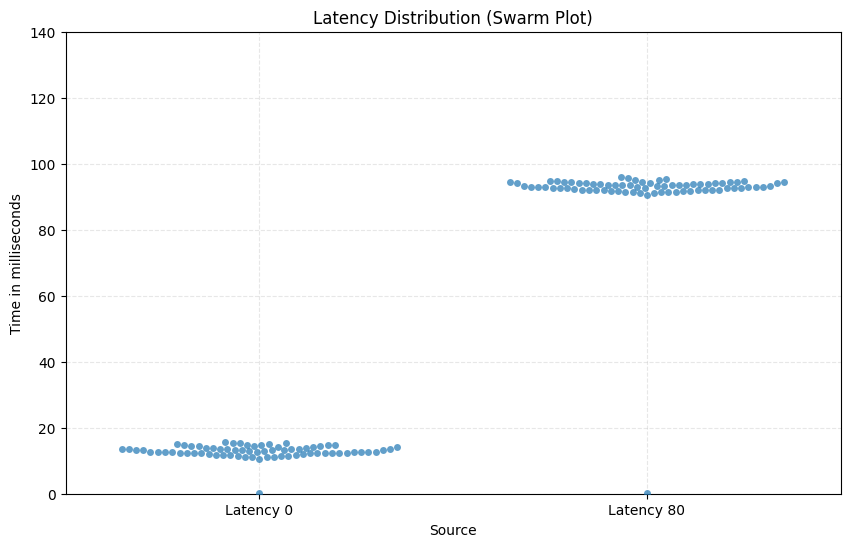

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df['Source'], y=df['Latency (ms)'], alpha=0.7)
plt.xlabel("Source")
plt.ylabel("Time in milliseconds")
plt.title("Latency Distribution")
plt.grid(True, linestyle='--', alpha=0.3)

plt.ylim([0, 140])

plt.show()

In [43]:
df_0["Latency (ms)"].mean()

12.915661971830987

In [45]:
df_80["Latency (ms)"].mean()

91.92735135135135